# 벤포드의 법칙 (Benford law)

<img width="50%" src="https://i.imgur.com/FmExD6c.png" >


### 2019 [FinanceData.KR](http://financedata.kr) | [facebook.com/financedata](http://facebook.com/financedata)


# 벤포드의 법칙 (Benford law)
임의의 데이터 집합에서 처음 시작하는 수로 가장 많이 등장하는 것이 '1'이고, '2', '3' 순서대로 낮아 진다는 법칙

* 데이터의 첫 자리가 1인 경우가 가장 많다 (30%)
* 첫 자리의 숫자의 비율은 로그에 따라 결정
* 첫 자리 1: 30.1%, 2: 17.6%, 3: 12.5% ...

$$ 
P(d) = \log_{10}\left( \frac{d+1}{d} \right)
$$

[Benford's law (wikipedia)](https://en.wikipedia.org/wiki/Benford's_law)

## 벤포드 값 구하기

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.grid'] = True 
plt.rcParams['lines.linewidth'] = 2

In [2]:
import numpy as np

for d in range(1, 10):
  v = np.log10((d+1)/d)
  print('{:.4f}'.format(v))

0.3010
0.1761
0.1249
0.0969
0.0792
0.0669
0.0580
0.0512
0.0458


In [3]:
benford_values =  {d:np.log10((d+1)/d) for d in range(1,10)}
benford_values

{1: 0.3010299956639812,
 2: 0.17609125905568124,
 3: 0.12493873660829993,
 4: 0.09691001300805642,
 5: 0.07918124604762482,
 6: 0.06694678963061322,
 7: 0.05799194697768673,
 8: 0.05115252244738129,
 9: 0.04575749056067514}

In [4]:
import pandas as pd

df = pd.DataFrame({'benford': benford_values})
df

,benford
1,0.301030
2,0.176091
3,0.124939
4,0.096910
5,0.079181
6,0.066947
7,0.057992
8,0.051153
9,0.045757


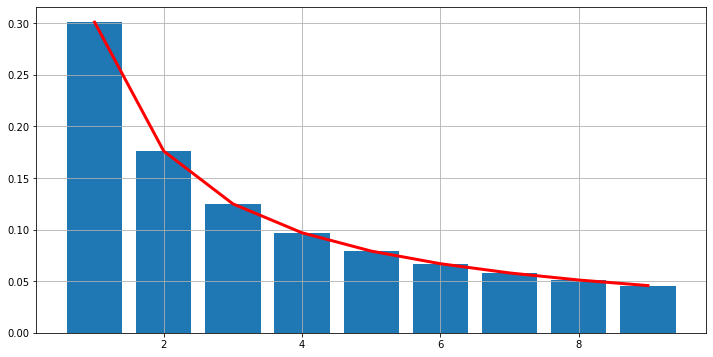

In [5]:
plt.bar(range(1, 10), df.benford)
plt.plot(range(1, 10), df.benford, color='r', lw=3)

# 조작된 영수증을 찾아라 

<img width="80%" src="https://i.imgur.com/tX4mtlX.png" >

http://hkconsensus.hankyung.com/apps.analysis/analysis.downpdf?report_idx=522341


## Enron 회계 조작사건 
2001년 미국 수학자 마크 니그리니가 벤포드 법칙을 통해 회계 부정을 적발

<img src="https://i.imgur.com/mSGkPo2.jpg" >

https://successfulportfolios.com/good-clean-fun-with-numbers/

# 다양한 사례
* [영국 LIBOR, 은행들 간의 금리 조작 담합 적발](https://dbr.donga.com/article/view/1206/article_no/6853)
* [2009년 이란 부정선거의 증거](https://en.wikipedia.org/wiki/Iranian_presidential_election,_2009)
* [그리스가 EU 가입시 제출한 거시경제 지표 조작](https://www.forbes.com/sites/timworstall/2011/09/12/greece-was-lying-about-its-budget-numbers)


# 전자공시(DART) 재무제표 데이터

#### 삼성전자 사업보고서 (2018년) (공시일자: 2019-04-01)
http://dart.fss.or.kr/dsaf001/main.do?rcpNo=20190401004781

#### III. 재무에 관한 사항 / 2. 연결재무제표
http://dart.fss.or.kr/report/viewer.do?rcpNo=20190401004781&dcmNo=6616741&eleId=13&offset=625579&length=120141&dtd=dart3.xsd

(개별 보고서의 프레임소스 보기를 통해 본문의 URL을 얻을 수 있습니다)


In [18]:
import pandas as pd

# 2016년, 2017년, 2018년 재무제표 (연결 재무상태표)
url = 'http://dart.fss.or.kr/report/viewer.do?rcpNo=20140324000163&dcmNo=4087556&eleId=25&offset=1134748&length=300531&dtd=dart3.xsd'

df_list = pd.read_html(url)
len(df_list)

46

In [19]:
# 연결 재무상태표(BS)
df_bs = df_list[1].astype(str)
df_bs.head(20)

,Unnamed: 0,제 45 기,제 44 기,제 43 기
0,자산,nan,nan,nan
1,유동자산,8414467007030,7879037253336,8271459836836
2,현금및현금성자산,1865508077008,1430279194448,1491833267976
3,매출채권 및 기타채권,4785253805264,4479489341545,4619627216150
4,재고자산,499239806623,869064953326,976321972013
5,단기금융자산,323187418196,318922860287,292223164261
6,기타유동자산,941277899939,781280903730,891454216436
7,비유동자산,4012845934801,3896914949313,3507992156280
8,유형자산,2242895871048,2253948594331,2195262907429
9,무형자산,194899238452,221423136039,115938342973


In [20]:
# 연결 포괄손익계산서 (IS)
df_is = df_list[7].astype(str)
df_is.head(20)

Unnamed: 0_level_0      Unnamed: 1_level_0                  자본  \
     Unnamed: 0_level_1      Unnamed: 1_level_1 지배기업의 소유주에게 귀속되는 자본   
     Unnamed: 0_level_2      Unnamed: 1_level_2                 자본금   
0       2011.01.01 (기초)         2011.01.01 (기초)      255000000000.0   
1                 총포괄이익                   당기순이익                 nan   
2                 총포괄이익            매도가능금융자산평가이익                 nan   
3                 총포괄이익            매도가능금융자산평가손실                 nan   
4                 총포괄이익                 지분법자본변동                 nan   
5                 총포괄이익               부의지분법자본변동                 nan   
6                 총포괄이익                해외사업환산이익                 nan   
7                 총포괄이익                해외사업환산손실                 nan   
8                 총포괄이익                파생상품평가이익                 nan   
9                 총포괄이익                파생상품평가손실                 nan   
10                총포괄이익          순확정급여부채의 재측정요소                 nan   
11                총포괄이익                총포괄손익 소계                 nan   
12  자본에 직접 반영된 소유주와의 거래                 자기주식 처분                 nan   
13  자본에 직접 반영된 소유주와의 거래                    연차배당                 nan   
14  자본에 직접 반영된 소유주와의 거래                연결범위의 변동                 nan   
15  자본에 직접 반영된 소유주와의 거래             비지배주주지분의 변동                 nan   
16  자본에 직접 반영된 소유주와의 거래                      기타                 nan   
17  자본에 직접 반영된 소유주와의 거래  자본에 직접 반영된 소유주와의 거래 소계                 nan   
18      2011.12.31 (기말)         2011.12.31 (기말)      255000000000.0   
19      2012.01.01 (기초)         2012.01.01 (기초)      255000000000.0   

                                                                            \
                                                                             
              자본잉여금              기타자본          기타포괄손익누계액        이익잉여금(결손금)   
0      161132826306  (83,502,547,119)       145071477172     3037108016558   
1               nan               nan                nan      401152146745   
2               nan               nan  (161,352,944,476)               nan   
3               nan               nan      (462,708,718)               nan   
4               nan               nan          624546937               nan   
5               nan               nan      (172,089,966)               nan   
6               nan               nan         4665946999               nan   
7               nan               nan    (7,949,017,841)               nan   
8               nan               nan         2166708479               nan   
9               nan               nan           15796217               nan   
10              nan               nan                nan  (30,722,920,449)   
11              nan               nan  (162,463,762,369)      370429226296   
12  (1,199,203,548)        1442673000                nan               nan   
13              nan               nan                nan  (49,478,849,000)   
14              nan               nan                nan               nan   
15              nan               nan                nan               nan   
16              nan               nan                nan        4439818873   
17  (1,199,203,548)        1442673000                nan  (45,039,030,127)   
18     159933622758  (82,059,874,119)   (17,392,285,197)     3362498212727   
19     159933622758  (82,059,874,119)   (17,392,285,197)     3362498212727   

                                                               
                                     비지배지분              자본 합계  
   지배기업의 소유주에게 귀속되는 자본 합계            비지배지분              자본 합계  
0           3514809772918     220903331815      3735713104733  
1            401152146745       5906330750       407058477495  
2       (161,352,944,476)     (59,233,201)  (161,412,177,677)  
3           (462,708,718)     (34,216,860)      (496,925,578)  
4               624546937              nan          624546937  
5           (172,089,966)     (82,648,154)      (254,738,120)  


In [21]:
# 연결 현금흐름표 (CF)
df_cf = df_list[13].astype(str)
df_cf.head(20)

,Unnamed: 0,제 45 기,제 44 기,제 43 기
0,매출액,7861809393837,8530989162786,8524883692768
1,공사매출,7594979699411,8330281380737,8350692555596
2,분양매출,181624628277,135943263739,106892388253
3,기타매출,85205066149,64764518310,67298748919
4,매출원가,8446954582642,7900955006240,7578780671971
5,공사매출원가,8152583142243,7659613385011,7330486384910
6,분양매출원가,195733087357,163721098315,173349062270
7,기타매출원가,98638353042,77620522914,74945224791
8,매출총이익(손실),"(585,145,188,805)",630034156546,946103020797
9,판매비와관리비,446251125297,496818027505,568081225178


데이터프레임에서 숫자를 제외한('[^0-9]')모든 내용을 빈 값('')으로 치환합니다.

In [22]:
import re

df_cf.replace('[^0-9]', '', regex=True).head(20)

,Unnamed: 0,제 45 기,제 44 기,제 43 기
0,,7861809393837,8530989162786,8524883692768
1,,7594979699411,8330281380737,8350692555596
2,,181624628277,135943263739,106892388253
3,,85205066149,64764518310,67298748919
4,,8446954582642,7900955006240,7578780671971
5,,8152583142243,7659613385011,7330486384910
6,,195733087357,163721098315,173349062270
7,,98638353042,77620522914,74945224791
8,,585145188805,630034156546,946103020797
9,,446251125297,496818027505,568081225178


데이터 프레임은 2차원 구조(컬럼과 로우로 구성)입니다. DataFrame.values로 2차원 값들만 추출할 수 있습니다.

2차원 자료구조를 reshape(-1) 하여 간단하게 1차원 리스트로 바꿀 수 있습니다.

In [23]:
val_list = df_cf.replace('[^0-9]', '', regex=True).values.reshape(-1)
val_list

array(['', '7861809393837', '8530989162786', '8524883692768', '',
       '7594979699411', '8330281380737', '8350692555596', '',
       '181624628277', '135943263739', '106892388253', '', '85205066149',
       '64764518310', '67298748919', '', '8446954582642', '7900955006240',
       '7578780671971', '', '8152583142243', '7659613385011',
       '7330486384910', '', '195733087357', '163721098315',
       '173349062270', '', '98638353042', '77620522914', '74945224791',
       '', '585145188805', '630034156546', '946103020797', '',
       '446251125297', '496818027505', '568081225178', '',
       '1031396314102', '133216129041', '378021795619', '',
       '387678330210', '388888264801', '527778594477', '', '480247350927',
       '430876371917', '360694432935', '', '207872511256', '216132610092',
       '205401754092', '', '213216343601', '133591399052', '237388545246',
       '', '1129309167164', '173769232965', '513119166007', '',
       '203275099416', '54635056399', '100548386491', '', 

## 첫 번째 숫자 추출하기

빈 값('')이 아닌 숫자 데이터의 첫 글자만 수집합니다

In [24]:
leading_digits = [int(v[0]) for v in val_list if v]

print(leading_digits)

[7, 8, 8, 7, 8, 8, 1, 1, 1, 8, 6, 6, 8, 7, 7, 8, 7, 7, 1, 1, 1, 9, 7, 7, 5, 6, 9, 4, 4, 5, 1, 1, 3, 3, 3, 5, 4, 4, 3, 2, 2, 2, 2, 1, 2, 1, 1, 5, 2, 5, 1, 9, 1, 4, 1, 2, 8]


## 개수 세기
파이썬의 dict를 사용하여 각 숫자의 개수를 카운트 합니다.

In [25]:
# counter dict 초기화
counter = {i:0 for i in range(1, 10)}

# dict를 사용하여 개수 세기
for i in leading_digits:
  counter[i] =  counter.get(i, 0) + 1

counter  

{1: 14, 2: 7, 3: 4, 4: 5, 5: 5, 6: 3, 7: 8, 8: 8, 9: 3}

In [26]:
total = sum(counter.values())
finstat_ratio = {i: counter[i]/total for i in counter.keys()}
finstat_ratio

{1: 0.24561403508771928,
 2: 0.12280701754385964,
 3: 0.07017543859649122,
 4: 0.08771929824561403,
 5: 0.08771929824561403,
 6: 0.05263157894736842,
 7: 0.14035087719298245,
 8: 0.14035087719298245,
 9: 0.05263157894736842}

In [27]:
df_ratio = pd.DataFrame({
    'benford': benford_values,
    'finstat': finstat_ratio
})

df_ratio

,benford,finstat
1,0.301030,0.245614
2,0.176091,0.122807
3,0.124939,0.070175
4,0.096910,0.087719
5,0.079181,0.087719
6,0.066947,0.052632
7,0.057992,0.140351
8,0.051153,0.140351
9,0.045757,0.052632


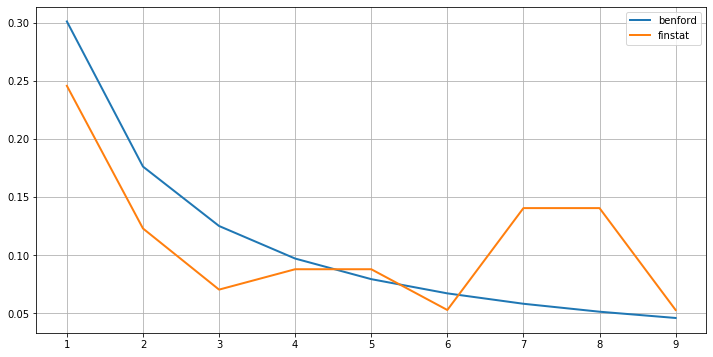

In [28]:
df_ratio.plot()

## RMSE 와 최대오차

$$
RMSE = \sqrt{\frac{\sum_{i=1}^{9}{(P(i) - P_{benford}(i))^2}}{9}} 
$$


In [29]:
rmse = ((df_ratio['finstat'] - df_ratio['benford']) ** 2).mean() ** 0.5
rmse

0.05170218530302402

In [30]:
np.abs(df_ratio['finstat'] - df_ratio['benford']).max()

0.08919835474560116

# 함수로 정리

In [31]:
import re
import numpy as np

def benford(df_list, plot=True):
  val_list = []
  # 전달된 데이터프레임 리스트에서 숫자 문자열만 추출
  for df in df_list:
    df = df.astype(str)
    # 특정 문자열을 포함하는 데이터프레임만 대상
    if any(x in df.to_html() for x in ['유동자산', '매출원가', '포괄손익', '현금흐름', '당기순이익']):
      values = df.replace('[^0-9]', '', regex=True).values.reshape(-1)
      val_list.extend(values)

  # 첫 글자 목록 추출
  leading_digits = [int(v[0]) for v in val_list if v]

  # 개수 세기
  counter = {i:0 for i in range(1, 10)}
  for i in leading_digits:
    counter[i] =  counter.get(i, 0) + 1

  # 비율 구하기
  total = sum(counter.values())
  finstat_ratio = {i: counter[i]/total for i in counter.keys()}

  # 데이터 프레임을 생성하여 반환
  benford_values =  {d:np.log10((d+1)/d) for d in range(1,10)}
  df_ratio = pd.DataFrame({
    'benford': benford_values,
    'finstat': finstat_ratio
  })
  if plot:
    df_ratio.plot()
  return df_ratio

# return RMSE와 최대오차(max)
def benford_desc(df_list):
  df = benford(df_list, plot=False)
  rmse = ((df['finstat'] - df['benford']) ** 2).mean() ** 0.5
  max_err = np.abs(df['finstat'] - df['benford']).max()
  return rmse, max_err

,benford,finstat
1,0.301030,0.263925
2,0.176091,0.186804
3,0.124939,0.112254
4,0.096910,0.113967
5,0.079181,0.070266
6,0.066947,0.050557
7,0.057992,0.056555
8,0.051153,0.065981
9,0.045757,0.055698
0,NaN,0.023993


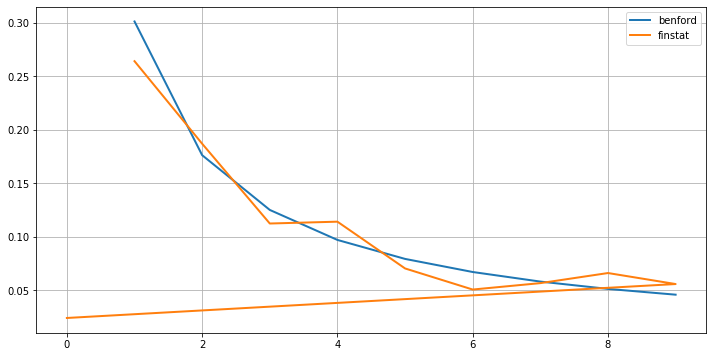

In [37]:
url = 'http://dart.fss.or.kr/report/viewer.do?rcpNo=20140324000163&dcmNo=4087556&eleId=25&offset=1134748&length=300531&dtd=dart3.xsd'
df_list = pd.read_html(url)
benford(df_list)

,benford,finstat
1,0.301030,0.254296
2,0.176091,0.183849
3,0.124939,0.108247
4,0.096910,0.128866
5,0.079181,0.079038
6,0.066947,0.073883
7,0.057992,0.061856
8,0.051153,0.072165
9,0.045757,0.037801


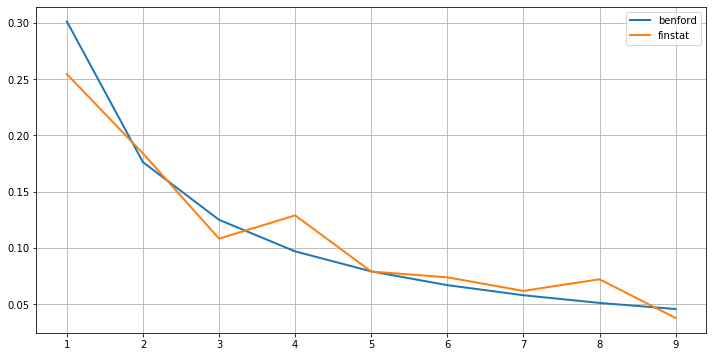

In [39]:
url = 'http://dart.fss.or.kr/report/viewer.do?rcpNo=20190401004781&dcmNo=6616741&eleId=13&offset=625579&length=120141&dtd=dart3.xsd'
df_list = pd.read_html(url)
benford(df_list)

## 모뉴엘	감사보고서 (2009.06)
http://dart.fss.or.kr/dsaf001/main.do?rcpNo=20090610000036

#### 재 무 제 표 (2008, 2009년)
http://dart.fss.or.kr/report/viewer.do?rcpNo=20090610000036&dcmNo=2330874&eleId=3&offset=9520&length=101157&dtd=dart3.xsd


In [32]:
import pandas as pd

url = 'http://dart.fss.or.kr/report/viewer.do?rcpNo=20090610000036&dcmNo=2330874&eleId=3&offset=9520&length=101157&dtd=dart3.xsd'
dfs = pd.read_html(url)
len(dfs)

16

In [33]:
dfs[14].head(10)

,과 목,제 5(당) 기,제 5(당) 기.1,제 4(전) 기,제 4(전) 기.1
0,Ⅰ. 영업활동으로 인한 현금흐름,NaN,"(13,485,949,268)",NaN,"(9,470,917,414)"
1,1. 당기순이익,7058328249,NaN,1230452397,NaN
2,2. 현금의 유출이 없는 비용 등의가산,1976501610,NaN,294925697,NaN
3,가. 매출채권매각손실,676839852,NaN,160677645,NaN
4,나. 감가상각비,47488363,NaN,16954023,NaN
5,다. 무형자산상각비,3732000,NaN,2834000,NaN
6,라. 대손상각비,193990867,NaN,6677932,NaN
7,마. 퇴직급여,69668803,NaN,40310697,NaN
8,바. 외화환산손실,984781725,NaN,67471400,NaN
9,3. 현금의 유입이 없는 수익 등의 차감,"(1,013,905,960)",NaN,"(101,769,720)",NaN


,benford,finstat
1,0.301030,0.372152
2,0.176091,0.177215
3,0.124939,0.093671
4,0.096910,0.096203
5,0.079181,0.070886
6,0.066947,0.070886
7,0.057992,0.048101
8,0.051153,0.027848
9,0.045757,0.043038


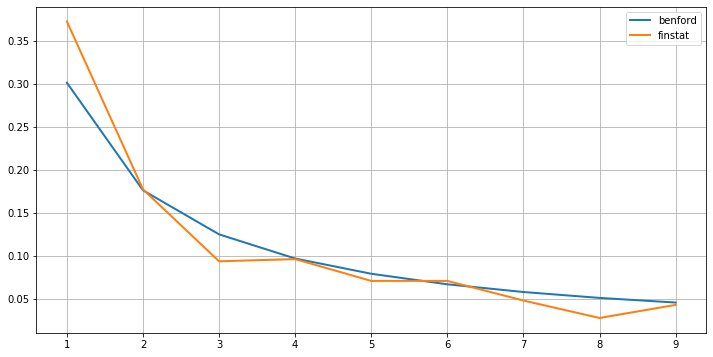

In [34]:
df = benford(dfs)
df

In [35]:
benford_desc(dfs)

(0.027427505525541764, 0.071121903070196)

### 2019 [FinanceData.KR](http://financedata.kr) | [facebook.com/financedata](http://facebook.com/financedata)